# Partie 1 - Manipulations de base avec OpenCV

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

## Charger une image

In [3]:
image = cv.imread("image.jpeg")

cv.imshow("Loading an image", image)

cv.waitKey(5000)

cv.destroyAllWindows()

## Capturer le flux vidéo d'une caméra

In [4]:
# Simulation d'un flux video avec un fichier mp4
video = cv.VideoCapture("video.mp4")

while (video.isOpened()):
    returnValue, frame = video.read()
    
    if not returnValue:
        break

    cv.imshow("Captured frame", frame)
    cv.waitKey(30)

cv.destroyAllWindows()


## Séparer les canaux d'une image et visualiser chacun séparement

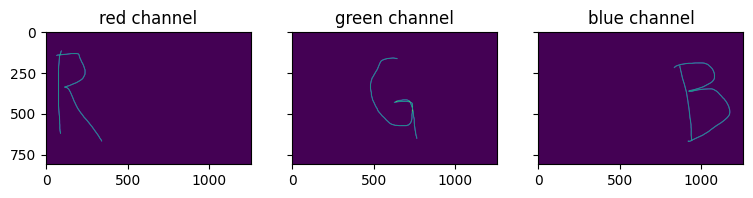

In [5]:
image = cv.imread("rgb.png")

image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

rChannel = image[:, :, 0]
gChannel = image[:, :, 1]
bChannel = image[:, :, 2]

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(9, 6), sharex=True, sharey=True)

axs[0].imshow(rChannel)
axs[0].set_title("red channel")
axs[1].imshow(gChannel)
axs[1].set_title("green channel")
axs[2].imshow(bChannel)
axs[2].set_title("blue channel")

plt.show()

## Convertir une image RGB en niveau de gris, en HSV, en BGR, ...

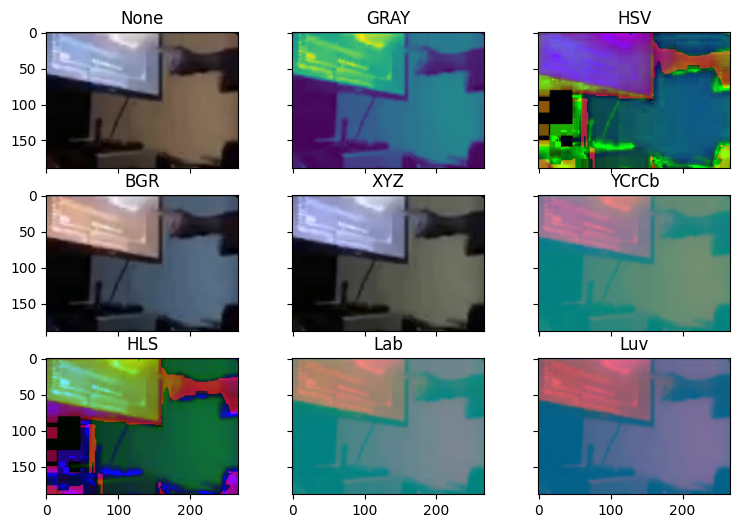

In [6]:
image = cv.imread("image.jpeg")

image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

colorSpace = ("None", cv.COLOR_RGB2GRAY, cv.COLOR_RGB2HSV, cv.COLOR_RGB2BGR, cv.COLOR_RGB2XYZ, cv.COLOR_RGB2YCrCb, cv.COLOR_RGB2HLS, cv.COLOR_RGB2Lab, cv.COLOR_RGB2Luv)
colorSpaceName = ("None", "GRAY", "HSV", "BGR", "XYZ", "YCrCb", "HLS", "Lab", "Luv")

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(9, 6), sharex=True, sharey=True)
for ax, method, methodStr in zip(axs.flat, colorSpace, colorSpaceName):
    processedImage = image
    if method != "None":
        processedImage = cv.cvtColor(image, method)
        
    ax.imshow(processedImage)
    ax.set_title(methodStr)

plt.show()

## Modifier la taille d'une image

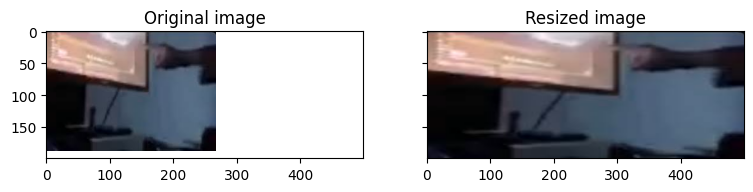

In [7]:
image = cv.imread("image.jpeg")

resizedImage = cv.resize(image, (500, 200))

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 6), sharex=True, sharey=True)
axs[0].imshow(image)
axs[0].set_title("Original image")
axs[1].imshow(resizedImage)
axs[1].set_title("Resized image")

plt.show()

## Faire une rotation d'une image

Text(0.5, 1.0, 'Rot by 45°')

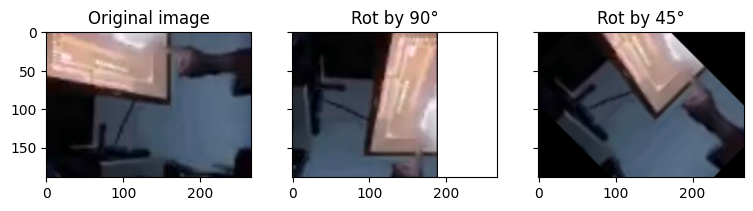

In [8]:
image = cv.imread("image.jpeg")

rotatedImage = cv.rotate(image, cv.ROTATE_90_CLOCKWISE)

rows, cols, _ = image.shape

M = cv.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0), -45, 1)
rotatedImage2 = cv.warpAffine(image, M, (cols, rows))

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(9, 6), sharex=True, sharey=True)
axs[0].imshow(image)
axs[0].set_title("Original image")
axs[1].imshow(rotatedImage)
axs[1].set_title("Rot by 90°")
axs[2].imshow(rotatedImage2)
axs[2].set_title("Rot by 45°")


## Flouter une image avec des filtres Gaussien ou Médian

Text(0.5, 1.0, 'Blurred image')

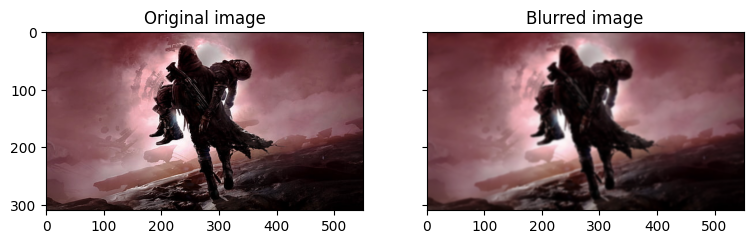

In [9]:
image = cv.imread("image2.jpg") 

blurredImage = cv.GaussianBlur(image, (7, 7), 0)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 6), sharex=True, sharey=True)
axs[0].imshow(image)
axs[0].set_title("Original image")
axs[1].imshow(blurredImage)
axs[1].set_title("Blurred image")

## Ajouter des dessins dans une image et dans un flux vidéo

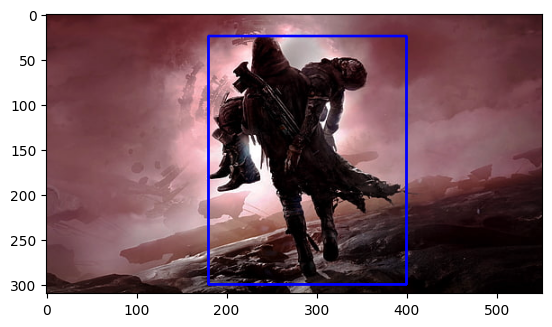

In [10]:
image = cv.imread("image2.jpg")
video = cv.VideoCapture("video.mp4")

cv.rectangle(image, (180, 300), (400, 25), (0, 0, 255), 2)
plt.imshow(image)

while (video.isOpened()):
    returnValue, frame = video.read()
    
    if not returnValue:
        break

    cv.ellipse(frame, (200, 100), (50, 20), 0, 0, 360, (0, 255, 0), 2)
    cv.imshow("Captured frame", frame)
    cv.waitKey(30)

cv.destroyAllWindows()

## Récupérer un clic dans une image ou vidéo

In [ ]:
def drawCircle(event, x, y, flag, param):
    while event == cv.EVENT_LBUTTONDOWN:
        cv.circle(image, (x, y), 20, (255, 0, 0), -1)

image = cv.imread("image2.jpg")
cv.namedWindow("Click to draw")
cv.setMouseCallback("Click to draw", drawCircle)

while (True):
    cv.imshow("Click to draw", image)
    if cv.waitKey(5000) & 0xFF == 27:
        break

video = cv.VideoCapture("video.mp4")

while (video.isOpened()):
    returnValue, frame = video.read()
    
    if not returnValue:
        break

    cv.rectangle(frame, (200, 100), (50, 20), (0, 255, 0), 2)
    cv.imshow("Captured frame", frame)
    cv.waitKey(30)

cv.waitKey(10000)

cv.destroyAllWindows()

# Partie 2 - Traitement d'images avec OpenCV 

## Production et application d'un masque circulaire sur une image

## Génération d'histogramme avant et après masquage

## Détection de contours par gradients

## Comparaison avec un filtrage Laplacien

# Partie 3 - Détection des émotions d'une webcam

# Partie 4 - Applications CV - À vous de jouer